<a href="https://colab.research.google.com/github/Zoezyh/Pytorch-Practice/blob/main/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device_cpu = "cpu"

2.5.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

Camera and photo apps use computer vision to enhance and sort images.

Modern cars use computer vision to avoid other cars and stay within lane lines.

Manufacturers use computer vision to identify defects in various products.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting means creating a model that matches (memorizes) the training set so closely that the model fails to make correct predictions on new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1.Train with more data.

2.Feature selection.

3.Regularization.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Check versions
print(torch.__version__)
print(torchvision.__version__)

# Setup training data
train_data = datasets.MNIST(
  root="data",
  train=True,
  download=True,
  transform=torchvision.transforms.ToTensor(),
  target_transform=None
)

test_data = datasets.MNIST(
  root="data",
  train=False,
  download=True,
  transform=ToTensor(),
  target_transform=None
)

class_names = train_data.classes

2.5.1+cu124
0.20.1+cu124
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 54.2MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.77MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.32MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

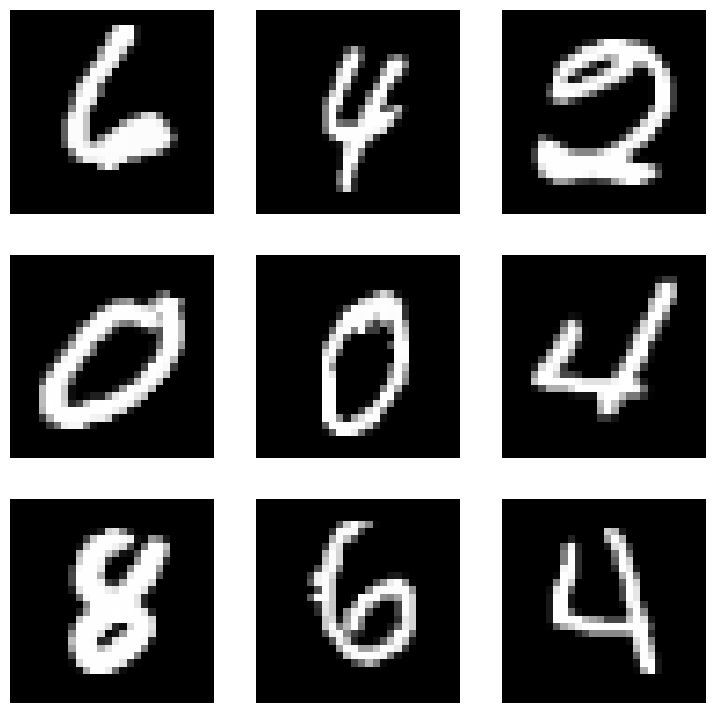

In [4]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt
import random

train_samples = []
train_labels = []
for sample, label in random.sample(list(train_data), k=9):
  train_samples.append(sample)
  train_labels.append(label)

# View the first sample shape
train_samples[0].shape

plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(train_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                batch_size=BATCH_SIZE,
                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
               batch_size=BATCH_SIZE,
               shuffle=False)

train_dataloader, test_dataloader

from tqdm.auto import tqdm

(<torch.utils.data.dataloader.DataLoader at 0x7cebfcd19510>,
 <torch.utils.data.dataloader.DataLoader at 0x7cebfcbabb50>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
# Create TinyVGG
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      # Create a conv layer
      nn.Conv2d(in_channels=input_shape,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,# Trick!
             out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1:{x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2:{x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier:{x.shape}")
    return(x)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [7]:
torch.manual_seed(42)
model_cpu = TinyVGG(input_shape=1,
         hidden_units=10,
         output_shape=len(class_names))
model = model_cpu.to(device)

In [8]:
rand_image_tensor = torch.randn(size=(1,28,28))

In [9]:
# Trick!
model(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

Functionizing training and evaluation/testing loops

In [24]:
def train_step(model:torch.nn.Module,
        data_loader:torch.utils.data.DataLoader,
        loss_fn:torch.nn.Module,
        optimizer:torch.optim.Optimizer,
        accuracy_fn,
        device:torch.device=device):
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                  y_pred=y_pred.argmax(dim=1)) # go from logits

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [25]:
def test_step(model:torch.nn.Module,
        data_loader:torch.utils.data.DataLoader,
        loss_fn:torch.nn.Module,
        accuracy_fn,
        device:torch.device=device):
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference model context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calcualte the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                   y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [ ]:
def eval_model(model:torch.nn.Module,
        data_loader:torch.utils.data.DataLoader,
        loss_fn:torch.nn.Module,
        accuracy_fn,
        device=device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                 y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
       "model_loss": loss.item(),
       "model_acc": acc}

In [26]:
def print_train_time(start: float,
           end: float,
           device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [27]:
# Setup loss function/eval metrics/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
               lr=0.1)
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn


helper_functions.py already exists, skipping download...


In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_on_cpu = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device_cpu)
  test_step(model=model,
       data_loader=test_dataloader,
       loss_fn=loss_fn,
       accuracy_fn=accuracy_fn,
       device=device_cpu)

  train_time_end_model_on_cpu = timer()
  total_train_timr_model_on_cpu = print_train_time(start=train_time_start_model_on_cpu,
                        end=train_time_end_model_on_cpu,
                        device=device_cpu)


train_time_start_model_on_gpu = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)
  test_step(model=model,
       data_loader=test_dataloader,
       loss_fn=loss_fn,
       accuracy_fn=accuracy_fn,
       device=device)

  train_time_end_model_on_cpu = timer()
  total_train_timr_model_on_cpu = print_train_time(start=train_time_start_model_on_cpu,
                        end=train_time_end_model_on_cpu,
                        device=device)

  model_cpu_results = eval_model(model=model_cpu,
                   data_loader=test_dataloader,
                   loss_fn=loss_fn,
                   accuracy_fn=accuracy_fn,
                   device=device_cpu)
  model_gpu_results = eval_model(model=model_cpu,
                   data_loader=test_dataloader,
                   loss_fn=loss_fn,
                   accuracy_fn=accuracy_fn,
                   device=device)
  print(model_cpu_results)
  print(model_gpu_results)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.08353 | Train acc: 97.40%
Train time on cpu: 50.418 seconds
Epoch: 1
-------
Train loss: 0.06446 | Train acc: 98.00%
Train time on cpu: 99.276 seconds
Epoch: 2
-------
Train loss: 0.05489 | Train acc: 98.27%
Train time on cpu: 147.996 seconds
Epoch: 3
-------
Train loss: 0.04916 | Train acc: 98.42%
Train time on cpu: 196.856 seconds
Epoch: 4
-------
Train loss: 0.04521 | Train acc: 98.59%
Train time on cpu: 251.176 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?